# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

Terdapat penggunaan berbagai library yang membantu proses klasifikasi ini, diantaranya adalah library NumPy, Pandas, Matplotlib, Seaborn, dan Scikit-Learn.

NumPy (np):

NumPy adalah library yang menyediakan struktur data, algoritma, dan fungsi matematika yang kuat untuk bekerja dengan array multidimensi atau matriks. Hal ini sangat penting dalam komputasi ilmiah dan analisis data.

Pandas (pd):
Pandas adalah library yang memfasilitasi analisis data dengan menyediakan struktur data tingkat tinggi seperti DataFrame, yang memungkinkan pengolahan dan analisis data yang efisien. Ini sering digunakan untuk membaca, memanipulasi, dan menganalisis data tabular.

Matplotlib (plt):
Matplotlib adalah library untuk visualisasi data di Python. Ini memungkinkan pembuatan berbagai jenis grafik, plot, diagram, dan visualisasi data lainnya, membantu memahami dan menyajikan informasi dengan lebih baik.

Seaborn (sns):
Seaborn adalah library yang membangun di atas Matplotlib untuk menyediakan antarmuka yang lebih tinggi dan estetika yang lebih baik untuk membuat visualisasi statistik yang menarik dan informatif.

scikit-learn (sklearn):
Scikit-learn adalah library yang sangat populer untuk machine learning di Python. Ini menyediakan berbagai algoritma, alat pemrosesan data, dan fungsi evaluasi untuk memfasilitasi pengembangan model machine learning.

LogisticRegression dari scikit-learn:
LogisticRegression adalah kelas dalam scikit-learn yang digunakan untuk melatih model regresi logistik, yang sering digunakan dalam klasifikasi biner di machine learning.

train_test_split dari scikit-learn:
train_test_split adalah fungsi dari scikit-learn yang membagi dataset menjadi subset pelatihan dan pengujian, memudahkan validasi model.

metrics dari scikit-learn:
Modul metrics di scikit-learn menyediakan berbagai metrik evaluasi seperti akurasi, presisi, recall, dan lain-lain untuk menilai kinerja model machine learning.

preprocessing dari scikit-learn:
Modul preprocessing di scikit-learn menyediakan alat untuk pra-pemrosesan data, seperti normalisasi, pengkodean label, pengisian nilai yang hilang, dan transformasi data sebelum digunakan dalam model machine learning.

# Dataset

Dataset yang digunakan pada kali ini berasal dari Kaggle. Dataset ini dikumpulkan dan disediakan oleh "National Institute of Diabetes and Digestive and Kidney Diseases" sebagai bagian dari Pima Indians Diabetes Database. Beberapa batasan diterapkan pada pemilihan contoh dari sebuah basis data yang lebih besar. Secara khusus, semua pasien di sini berasal dari warisan suku Pima Indian (subkelompok dari Orang Asli Amerika), dan merupakan perempuan yang berusia 21 tahun ke atas.

Source: https://www.kaggle.com/datasets/kandij/diabetes-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode ini digunakan untuk menghubungkan Google Drive Anda dengan Google Colab, yang merupakan lingkungan penelitian dan pengembangan berbasis cloud.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

Pada dataset ini, terdapat 9 kolom, yaitu pregnancies, glucose, bloodpressures, skinthicknes, insulin, BMI, diabetespedigreefunction, age, dan kolom outcome (target).

Datasets ini memiliki 768 baris dan 9 kolom

# Gambaran Data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='BMI', ylabel='Count'>

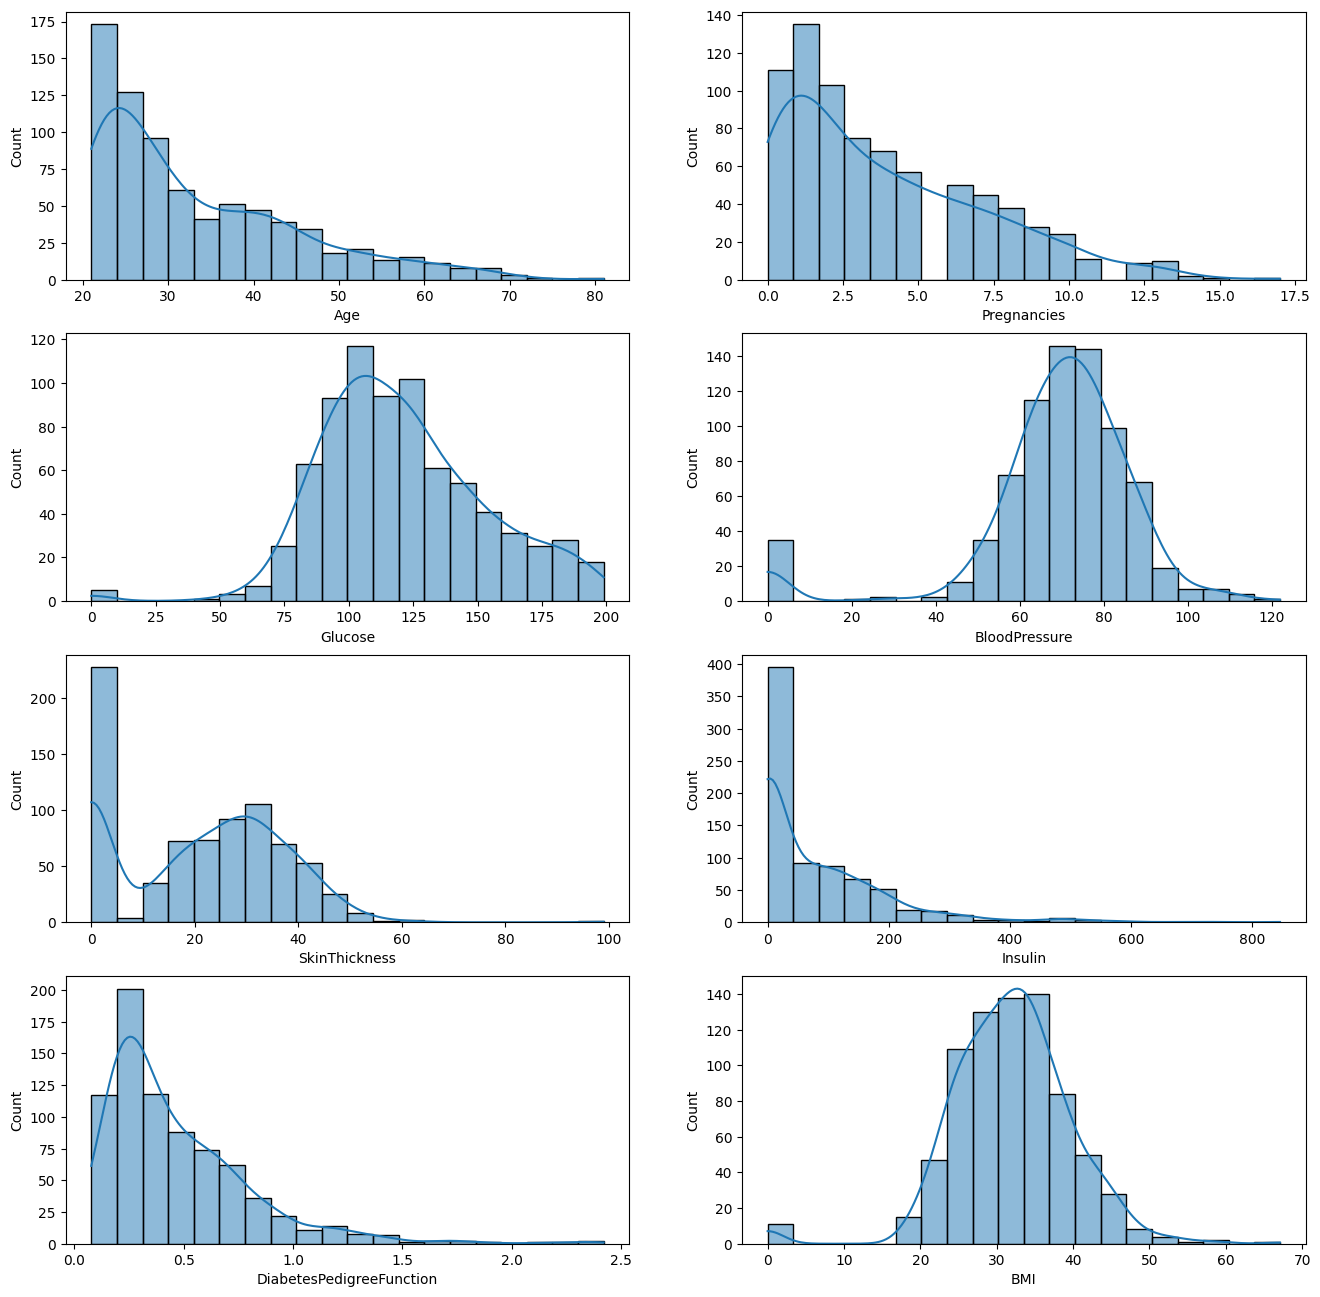

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins = 20, ax=ax[0,0], kde=True)
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1], kde=True)
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0], kde=True)
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1], kde=True)
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0], kde=True)
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1], kde=True)
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], kde=True)
sns.histplot(df.BMI, bins = 20, ax=ax[3,1], kde=True)

Hasil akhir adalah subplot dengan histogram dan kurva KDE untuk masing-masing fitur yang diplotkan, memberikan visualisasi tentang distribusi dan pola data pada setiap fitur.

# Data Cleaning

In [ ]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Series([], dtype: float64)


Kode ini digunakan untuk mengidentifikasi dan mendapatkan informasi tentang nilai yang hilang (missing values) dalam DataFrame df.

In [ ]:
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Kode (df == 0).sum(axis=0) digunakan untuk menghitung jumlah kemunculan nilai 0 dalam setiap kolom (sum(axis=0)) di DataFrame

In [ ]:
df['Pregnancies'].replace(0,df['Pregnancies'].median(),inplace=True)
df['Glucose'].replace(0,df['Glucose'].median(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)
df['BMI'].replace(0,df['BMI'].median(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)

Kode di atas menggambarkan pengolahan data untuk menggantikan nilai 0 dengan median untuk sebagian kolom dalam DataFrame

In [ ]:
(df == 0).sum(axis=0)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Kode df.groupby(['Outcome']).count() digunakan untuk melakukan pengelompokan berdasarkan nilai pada kolom 'Outcome' di DataFrame df dan menghitung jumlah entri untuk setiap nilai kategori pada kolom tersebut.

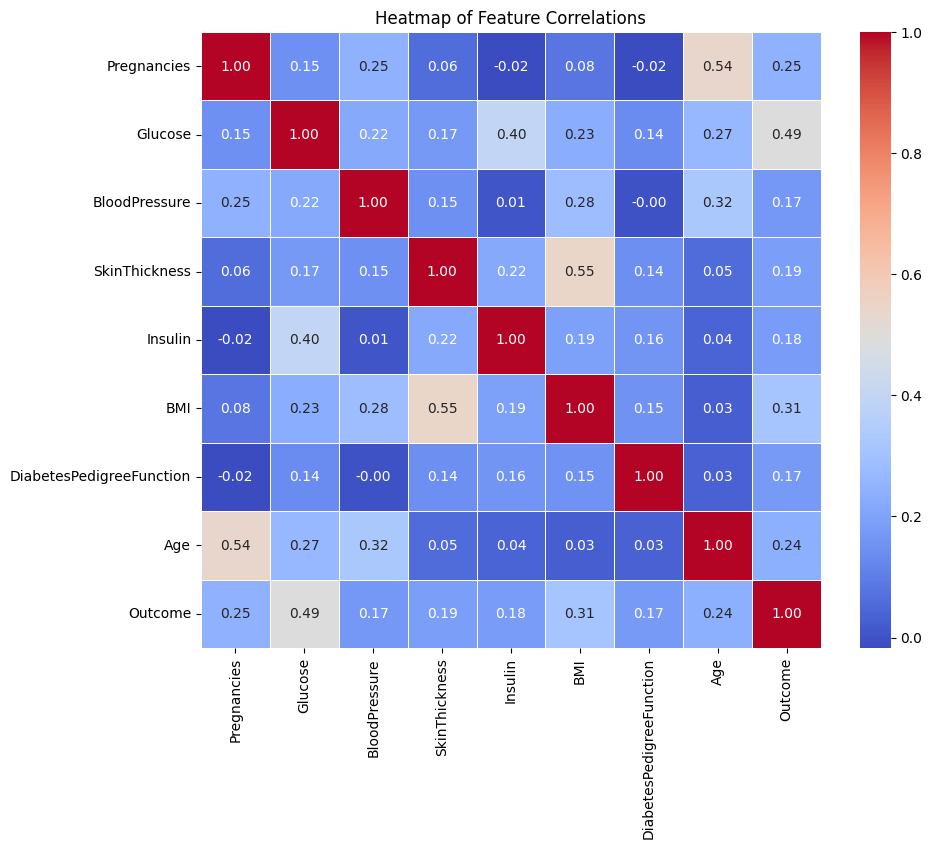

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

Fungsi heatmap dari Seaborn digunakan untuk membuat visualisasi heatmap dari matriks korelasi. Korelasi mengukur hubungan statistik antara dua variabel. Dalam konteks matriks korelasi, ini adalah korelasi antarfitur dalam dataset, yang sering digunakan untuk menilai seberapa kuat hubungan linier antar fitur.

# Create Model

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

Kode di atas melakukan pemisahan data menjadi fitur dan label/target untuk digunakan dalam pembuatan model machine learning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
type(x_train)

pandas.core.frame.DataFrame

Kode di atas digunakan untuk membagi data menjadi data latih (train) dan data uji (test) menggunakan fungsi train_test_split dari scikit-learn.

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print('Accuracy = ',model_score)
print(metrics.confusion_matrix(y_test,y_predict))

Accuracy =  0.7760416666666666
[[107  16]
 [ 27  42]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Kode tersebut melakukan pelatihan dan evaluasi model regresi logistik (Logistic Regression) untuk klasifikasi dengan menggunakan data yang telah dibagi sebelumnya menjadi data latih (x_train, y_train) dan data uji (x_test, y_test).

Conffussion Matrix:
Pasien Terkena Diabetes (Positive Class):

True Positives (TP): Ada 42 pasien yang benar-benar terkena diabetes dan telah diprediksi dengan benar sebagai pasien diabetes.

False Negatives (FN): Terdapat 27 pasien yang sebenarnya terkena diabetes, namun diprediksi tidak terkena diabetes. Ini merupakan kesalahan prediksi di mana sistem mengabaikan kondisi sebenarnya pasien yang seharusnya terkena diabetes.

Pasien Tidak Terkena Diabetes (Negative Class):

True Negatives (TN): Sebanyak 107 pasien yang benar-benar tidak terkena diabetes dan diprediksi dengan benar sebagai pasien tidak terkena diabetes.

False Positives (FP): Terdapat 16 pasien yang sebenarnya tidak terkena diabetes, namun diprediksi terkena diabetes. Ini merupakan kesalahan prediksi di mana sistem keliru mengidentifikasi pasien yang seharusnya tidak terkena diabetes sebagai pasien diabetes.

In [ ]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       123
           1       0.72      0.61      0.66        69

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.77      0.78      0.77       192



Laporan klasifikasi memberikan informasi tentang kinerja model klasifikasi. Itu mencakup informasi tentang presisi, recall, dan F1-score untuk setiap kelas, serta rata-rata dari metrik-metrik ini.